In [20]:
# imports
import pandas as pd
from joblib import dump, load
from sklearn.model_selection import train_test_split

In [ ]:
#already trained model
model = load("bacterial_infection.pkl")

In [ ]:
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor(
    max_depth=200,
    min_samples_split=40
)

In [25]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=20,
    min_samples_split=10
)

In [9]:
# regression algorithm - bacterial infection in water sample
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("waterQuality1.csv")
df = df.loc[~(df == "#NUM!").any(axis=True)]

Y = df["bacteria"]
X = df.drop(columns=["bacteria"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

model.fit(X_train, Y_train)

dump(model, "bacterial_infection.pkl")

Y_pred = model.predict(X_train)
train_error = mean_absolute_error(Y_train, Y_pred)

Y_pred = model.predict(X_test)
test_error = mean_absolute_error(Y_test, Y_pred)

print(f"Train error: {train_error}\nTest error: {test_error}\n") #0.07146264053509307 0.10000649496641117
print(f"Overfitting Risks" if test_error - train_error > 1 else "Underfitting Risks")

Train error: 0.07146264053509307
Test error: 0.10005697573564193

Underfitting Risks


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# df.replace("#NUM!", pd.NA, inplace=True)     # TypeError: float() argument must be a string or a real number, not 'NAType'
# df.dropna()

df = pd.read_csv("waterQuality1.csv")
df = df.loc[~(df == "#NUM!").any(axis=True)]

Y = df["is_safe"]
X = df.drop(columns=["is_safe"], axis=1)

param_grid = {
    "max_depth": [3, 5, 10, None],  
    "min_samples_split": [2, 5, 10], 
    "min_samples_leaf": [1, 2, 5],  
    "criterion": ["gini", "entropy", "log_loss"]  # mathmetical strategy
}

est = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=est,
    param_grid=param_grid,
    scoring="accuracy",  # metrics
    cv=5,  
    n_jobs=-1  # use all available CPU cores
)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

dump(model, "water_safety.pkl")

Y_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_pred)

Y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred)

print(f"Train error: {train_accuracy}\nTest error: {test_accuracy}\n") #Train error: 0.9909318323952471 #Test error: 0.963125



Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Train error: 0.9851469668542839
Test error: 0.96125



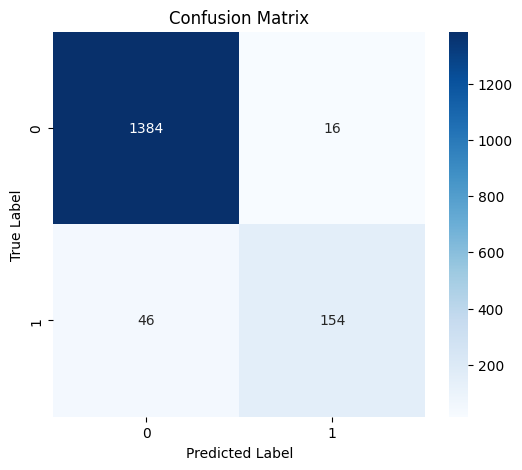

In [32]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [28]:
counts = df["is_safe"].value_counts()
print(counts)

is_safe
0    7084
1     912
Name: count, dtype: int64
